In [992]:
import numpy as np
import pandas as pd 

In [993]:
#הורדת עמודות לא רלוונטיות לניתוח הדאטה
desc = pd.read_csv('games_description.csv')
desc = desc.drop(columns=['short_description'])
desc.head()

,name,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741


In [994]:
rank = pd.read_csv('games_ranking.csv')
rank.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [995]:
desc.shape

(290, 10)

In [996]:
desc.columns

Index(['name', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')

In [997]:
desc.axes

[RangeIndex(start=0, stop=290, step=1),
 Index(['name', 'genres', 'minimum_system_requirement',
        'recommend_system_requirement', 'release_date', 'developer',
        'publisher', 'overall_player_rating',
        'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
       dtype='object')]

In [998]:
desc.index

RangeIndex(start=0, stop=290, step=1)

In [999]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   genres                                   290 non-null    object
 2   minimum_system_requirement               290 non-null    object
 3   recommend_system_requirement             290 non-null    object
 4   release_date                             290 non-null    object
 5   developer                                290 non-null    object
 6   publisher                                290 non-null    object
 7   overall_player_rating                    290 non-null    object
 8   number_of_reviews_from_purchased_people  290 non-null    object
 9   number_of_english_reviews                290 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 22.8+ KB


In [1000]:
desc.nunique()

name                                       290
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

### **שלב 1: טעינת הנתונים וסטנדרטיזציה של עמודת המפתח (Pre-Merge Cleaning)**

Rename the name column in the description table to be identical to the name column in the rank table:

In [1001]:
#שינוי שם עמודת המפתח - שם המשחק שיהיה זהה בשץי הטבלאות 
desc = desc.rename(columns={'name': 'game_name'})


 Whitespace Removal: (Data standarization before merge):

In [1002]:
#יישום הסרת רווחים בעמודת השמות בטבלת הדירוג
rank['game_name'] = rank['game_name'].str.strip()

In [1003]:
#יישום הסרת רווחים בעמודת השמות בטבלת התיאור
desc['game_name'] = desc['game_name'].str.strip()

Case Normalization (Data standarization before merge):


In [1004]:
desc['game_name'] = desc['game_name'].str.lower()

In [1005]:
rank['game_name'] = rank['game_name'].str.lower()

In [1006]:
rank.shape

(672, 4)

In [1007]:
rank.columns

Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')

In [1008]:
rank.axes

[RangeIndex(start=0, stop=672, step=1),
 Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')]

In [1009]:
rank.index

RangeIndex(start=0, stop=672, step=1)

In [1010]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  672 non-null    object
 1   genre      672 non-null    object
 2   rank_type  672 non-null    object
 3   rank       672 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [1011]:
rank.nunique()

game_name    303
genre          6
rank_type      3
rank          40
dtype: int64

### **שלב 2 : איחוד דאטות עי שימוש  merge:**

In [1012]:
# Assuming desc and rank are steam_df and the other relevant dataframe, respectively.

# rank is a dataframe from cell 3 or 13 (wide, with genre, rank_type, rank)
# We'll call it `rank_df` as a name, but in your context you may need to adjust

# If not already loaded, you probably have:
# rank_df = pd.read_csv("...") or loaded from some code earlier

# Here we merge steam_df and rank_df according to the structure of rank_df (which has 'game_name', 'genre', 'rank_type', 'rank')
# We perform a left merge from rank_df to steam_df to keep the order and rows of rank_df

merged_df = rank.merge(desc, left_on='game_name', right_on='game_name', how='left')
merged_df.head()


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0


In [1013]:
print(merged_df.columns)

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')


In [1014]:
merged_df.nunique()

game_name                                  303
genre                                        6
rank_type                                    3
rank                                        40
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

In [1015]:
# merged_df.sort_values(merged_df['game_name'], ascending=True)
# This is incorrect because `by` should be a column label or a list of column labels, not a Series.
# The correct usage:
#merged_df.sort_values(by='game_name', ascending=True)

In [1016]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                672 non-null    object 
 1   genre                                    672 non-null    object 
 2   rank_type                                672 non-null    object 
 3   rank                                     672 non-null    int64  
 4   genres                                   656 non-null    object 
 5   minimum_system_requirement               656 non-null    object 
 6   recommend_system_requirement             656 non-null    object 
 7   release_date                             656 non-null    object 
 8   developer                                656 non-null    object 
 9   publisher                                656 non-null    object 
 10  overall_player_rating                    656 non-n

### **שלב 3: טיפול בערכים החסרים הנסתרים בעמודת genres (Post-Merge Cleaning):**

In [1017]:
# 1. המרת מחרוזות ריקות או רווחים ל-NaN אמיתי
# מחרוזות ריקות
merged_df['genres'] = merged_df['genres'].replace('', np.nan)
# מחרוזות המכילות רווחים בלבד
merged_df['genres'].replace(r'^\s*$', np.nan, regex=True)

0      ['FPS', 'Shooter', 'Multiplayer', 'Competitive...
1      ['Warhammer 40K', 'Action', 'Third-Person Shoo...
2      ['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...
3      ['Mythology', 'Action RPG', 'Action', 'RPG', '...
4      ['Souls-like', 'Dark Fantasy', 'Open World', '...
                             ...                        
667    ['Simulation', 'Racing', 'Sports', 'Motocross'...
668    ['Simulation', 'Racing', 'Sports', 'Motorbike'...
669    ['Racing', 'Sports', 'Simulation', 'Motorbike'...
670    ['Racing', 'Action', 'Indie', 'Sports', 'Adven...
671    ['Simulation', 'Adventure', 'Sports', 'Casual'...
Name: genres, Length: 672, dtype: object

In [1018]:
# 2. מילוי ערכי NaN: מילוי הז'אנרים החסרים ב-'Unknown'
# פעולה זו נדרשת כדי למנוע כשלים בשלב הפיצול
merged_df['genres'] = merged_df['genres'].fillna('Unknown')

### **שלב 4: פיצול והכפלת שורות הז'אנר (Exploding Genres):**

In [1019]:
 #פיצול חרוזת הז'אנרים לפי ז'אנר
# פיצול לפי פסיק, תוך התעלמות מרווחים לפני ואחרי הפסיק
merged_df['genres_list'] = merged_df['genres'].str.split(r',\s*')
merged_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,genres_list
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,"[['FPS', 'Shooter', 'Multiplayer', 'Competitiv..."
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,"[['Warhammer 40K', 'Action', 'Third-Person Sho..."
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,"[['Cyberpunk', 'Open World', 'Nudity', 'RPG', ..."
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0,"[['Mythology', 'Action RPG', 'Action', 'RPG', ..."
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0,"[['Souls-like', 'Dark Fantasy', 'Open World', ..."


In [1020]:
# 2. הכפלת השורות (Explode)
merged_df_new = merged_df.explode('genres_list')
merged_df_new  = merged_df_new.rename(columns={'genres_list': 'normalize'})

In [1021]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                12666 non-null  object 
 1   genre                                    12666 non-null  object 
 2   rank_type                                12666 non-null  object 
 3   rank                                     12666 non-null  int64  
 4   genres                                   12666 non-null  object 
 5   minimum_system_requirement               12650 non-null  object 
 6   recommend_system_requirement             12650 non-null  object 
 7   release_date                             12650 non-null  object 
 8   developer                                12650 non-null  object 
 9   publisher                                12650 non-null  object 
 10  overall_player_rating                    12650 non-nu

In [1022]:
# 3. סטנדרטיזציה סופית של הז'אנרים המפוצלים (אותיות קטנות והסרת רווחים)
# This line is incorrect because it tries to assign a non-existent column 'normalized_genre' to itself.
# Instead, you should create 'normalized_genre' from the appropriate column, typically by standardizing the split genre values.
# For standardizing (lowercase & strip) the exploded genre column, use:
merged_df_new['normalized_genre'] = merged_df_new['normalize'].str.lower().str.strip()

In [1023]:
merged_df_new.loc[:, 'genre']

0               Action
0               Action
0               Action
0               Action
0               Action
            ...       
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
Name: genre, Length: 12666, dtype: object

In [1024]:
merged_df_new.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,['FPS',['fps'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Shooter','shooter'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Multiplayer','multiplayer'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Competitive','competitive'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'


### **שלב 5: סינון לז'אנרי הליבה (Final Filtering):**

In [1025]:
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports'", "'racing'"]
# Check which unique values are present in normalized_genre vs core_genres to debug filtering
print("Unique normalized_genre values:\n", merged_df_new['normalized_genre'].unique())
print("Core genres:", core_genres)
print("Intersection (matches):", set(merged_df_new['normalized_genre'].unique()) & set(core_genres))

# See top values by frequency
print("Top genre frequencies after normalization:")
print(merged_df_new['normalized_genre'].value_counts())

# Filtering as before (for reference, can comment/uncomment for real run)
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

Unique normalized_genre values:
 ["['fps'" "'shooter'" "'multiplayer'" "'competitive'" "'action'"
 "'team-based'" "'esports'" "'tactical'" "'first-person'" "'pvp'"
 "'online co-op'" "'co-op'" "'strategy'" "'military'" "'war'"
 "'difficult'" "'trading'" "'realistic'" "'fast-paced'" "'moddable']"
 "['warhammer 40k'" "'third-person shooter'" "'adventure'"
 "'action-adventure'" "'pve'" "'third person'" "'wargame'" "'sci-fi'"
 "'3d'" "'narration'" "'fantasy'" "'space'" "'singleplayer'" "'cinematic'"
 "'futuristic']" "['cyberpunk'" "'open world'" "'nudity'" "'rpg'"
 "'futuristic'" "'fps'" "'mature'" "'story rich'" "'atmospheric'"
 "'exploration'" "'violent'" "'great soundtrack'" "'action rpg'"
 "'character customization'" "'immersive sim']" "['mythology'"
 "'souls-like'" "'combat'" "'drama'" "'dark fantasy'" "'hack and slash'"
 "'music'" "'violent']" "['souls-like'" "'family friendly']" "['survival'"
 "'battle royale'" "'early access'" "'simulation'" "'stealth']" 'unknown'
 "['free to play'"

In [1026]:
# Yes, you can merge "sports" and "racing" into one genre label, e.g. "'sports & racing'", in the normalized_genre column. 
# This is usually done by replacing both "'sports'" and "'racing'" values with "'sports & racing'". Here is the code to do that:

# Merge "'sports'" and "'racing'" into "'sports & racing'" in normalized_genre column
merged_df_new['normalized_genre'] = merged_df_new['normalized_genre'].replace(["'sports'", "'racing'"], "'sports & racing'")

# After the merge, update the core_genres list and filter again accordingly
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports & racing'"]
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]


In [1027]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [1028]:
#  סינון הנתונים כן שיישארו רק הרשומות הרלוונטיות ל-6 הז'אנרים המרכזיים שהוגדרו בפרויקט
#core_genres = ['Action', 'Adventure', 'Role-Playing', 'Strategy', 'Simulation', 'Sports & Racing']

# סינון ה-DataFrame הסופי
#final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

In [1029]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [1030]:
# Display first few rows and shape to diagnose why final_df might be empty
final_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Sports','sports & racing'
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Sports','sports & racing'


In [1031]:
print(final_df['normalized_genre'].unique())

["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]


In [1032]:
# Check if 'sports & racing' is present and debug why it is missing
print("All unique genres in final_df:", final_df['normalized_genre'].unique())
print(final_df['normalized_genre'].value_counts())

if "'sports & racing'" not in final_df['normalized_genre'].unique():
    print("WARNING: 'sports & racing' not found in normalized_genre!")
    print("Example values from merged_df_new['normalized_genre'] for inspection:")
    print(merged_df_new['normalized_genre'].unique())
    print("Original 'genre' column sample:")
    print(final_df['genre'].unique())
    print("Unique normalized genres (full set):")
    print(set(merged_df_new['normalized_genre'].unique()))

All unique genres in final_df: ["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]
normalized_genre
'action'             351
'adventure'          299
'simulation'         258
'rpg'                219
'strategy'           169
'sports & racing'    146
Name: count, dtype: int64


In [1033]:

print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [1034]:
# בדיקה: כמה רשומות נותרו לאחר סינון הז'אנרים שאינם רלוונטיים?
print(f"Final rows for analysis: {len(final_df)}")

Final rows for analysis: 1442


For EDA on merged_df:
Overview: Use .head(), .info(), and .describe() for understanding size, types, and distributions.
Missing Values: Check missing values with .isnull().sum().
Duplicates: Check for duplicates if relevant.
Value Counts: Examine .value_counts() for categorical columns like genre, rank_type, overall_player_rating.
Distributions: Plot histograms/boxplots for numeric columns (rank, review numbers).
Correlations: Use .corr() and visualizations (heatmap) for relationships.
Group/Compare: Group by genre or rank_type to compare aggregates.
Outliers: Check for outliers in numeric columns.
Reason: These steps reveal data quality, structure, key trends, and potential insights.

**EDA on merged_df:**

**final_df  DataFrame is only for genre based-calculation:** זוהי טבלה "מנופחת" מכיוון שמכילה פיצול של משחקים לפי הז'אנרים העיקריים ולכן יש משחקים שמופיעים יותר מפעם אחת

In [1035]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'


In [1036]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [1037]:
print(final_df['genres'].isnull().sum())

0


In [1038]:
final_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre'],
      dtype='object')

In [1039]:
final_df.describe().round(2)

,rank,number_of_english_reviews
count,1442.00,1442.00
mean,19.46,114202.84
std,11.35,210659.34
min,1.00,0.00
25%,10.00,13860.00
50%,19.00,44785.00
75%,29.00,127592.25
max,40.00,2258990.00


In [1040]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

## **Data Cleaning and Preparation - pre-EDA:**

### **שלב 1 - טיפול באנומליות שליליות וערכים חסרים:**

In [1041]:
# 1. המרת הערכים השליליים לערכים ריקים (NaN), 
# מאחר ותצפיות לא יכולות להיות בעלות ערך שלילי נתייחס למספרים כאל Placeholders:
# אנו ממירים את העמודה לפורמט מספרי כדי שנוכל לזהות ערכים שליליים, עם פרמטר errors='coerce' 
# לטיפול בנתונים שאינם מספריים.
final_df.loc[:,'number_of_reviews_from_purchased_people'] = pd.to_numeric(
    final_df['number_of_reviews_from_purchased_people'], errors='coerce')

In [1042]:
#2.  זיהוי והמרת כל הערכים הקטנים מ-0 ל-NaN
final_df.loc[final_df['number_of_reviews_from_purchased_people'] < 0, 
             'number_of_reviews_from_purchased_people'] = np.nan

In [1043]:
# 3. השלמת ערכי NaN שנוצרו עם 0 (Imputation)
# The issue: fillna(0) returns a copy and does not modify the DataFrame in-place unless inplace=True is set or reassignment is used.
# The correct way is to reassign the result back, or use inplace=True:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_20992\2038491476.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)


In [1044]:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].astype(int)

### **שלב 2: המרת סוגי נתונים (Dtypes Conversion):**

**המרת עמודת התאריך ואת עמודת ספירת הביקורות האחרת לפורמטים המתאימים:**

In [1092]:
# 1. המרת תאריך: המרת 'release_date' מ-object ל-datetime
# העמודה release_date מסווגת כ-object כרגע [7].
# The below line fails because some date strings do not have year information (e.g. "Nov-18"),
# which causes pandas to throw "Out of bounds nanosecond timestamp" errors.
# To handle this, we can use errors='coerce' to convert unparseable dates to NaT and optionally inspect them.
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

In [1090]:
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'])

In [1089]:
final_df.dtypes

game_name                                          object
genre                                              object
rank_type                                          object
rank                                                int64
genres                                             object
minimum_system_requirement                         object
recommend_system_requirement                       object
release_date                               datetime64[ns]
developer                                          object
publisher                                          object
overall_player_rating                              object
number_of_reviews_from_purchased_people            object
number_of_english_reviews                         float64
normalize                                          object
normalized_genre                                   object
overall_player_rating_numeric                     float64
dtype: object

In [1046]:
final_df['release_date'].isna().sum()

np.int64(0)

In [1047]:
final_df['number_of_reviews_from_purchased_people'].isna().sum()

np.int64(0)

In [1048]:
# 2. המרת ספירה: המרת 'number_of_english_reviews' מ-float64 ל-int64
# העמודה מוגדרת כ-float64 [7], אך היא מייצגת ספירה
final_df.loc[:,'number_of_english_reviews'] = final_df['number_of_english_reviews'].astype(int)

In [1049]:
final_df['number_of_english_reviews'].isna().sum()

np.int64(0)

In [1050]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [1051]:
#overall_player_rating - defined as 'object', shoukd be defined as int:
# using mapping_dict to determine rating_order (mapping_dict = rating_map):
rating_order = {'Very Negative':1, 'Mostly Negative':2, 'Mixed':3, 'Mostly Positive':4, 'Positive':5, 'Very Positive':6, 'Overwhelmingly Positive':7}
final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)

C:\Users\ofirs\AppData\Local\Temp\ipykernel_20992\350586400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)


In [1052]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Strategy','strategy',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0


In [1053]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [1085]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
overall_player_rating_numeric              float64
dtype: object

**Final Step before EDA - creating data frame with no duplicates (for calculation based on other prameters besides genre):**

In [1054]:
unique_game_df = final_df.drop_duplicates(subset = ['game_name']).copy()

In [1055]:
unique_game_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0


In [1081]:
unique_game_df['release_date'] = pd.to_datetime(unique_game_df['release_date'])

In [1082]:
unique_game_df.dtypes

game_name                                          object
genre                                              object
rank_type                                          object
rank                                                int64
genres                                             object
minimum_system_requirement                         object
recommend_system_requirement                       object
release_date                               datetime64[ns]
developer                                          object
publisher                                          object
overall_player_rating                              object
number_of_reviews_from_purchased_people            object
number_of_english_reviews                         float64
normalize                                          object
normalized_genre                                   object
overall_player_rating_numeric                     float64
dtype: object

In [1056]:
# Let's investigate why only 276 games remain after cleaning, starting from the original 290.
print("Original number of games in raw data (game_description):", len(desc))
print("Number of games in unique_game_df:", len(unique_game_df))

# Let's see which game_names are missing after cleaning:
original_names = set(desc['game_name'].str.lower().str.strip())
cleaned_names = set(unique_game_df['game_name'].str.lower().str.strip())
missing_after_cleaning = original_names - cleaned_names

print(f"Number of games missing after cleaning: {len(missing_after_cleaning)}")
if missing_after_cleaning:
    print("Games lost after cleaning:")
    for name in sorted(missing_after_cleaning):
        print(name)

# Let's also check for any NaN in 'game_name' or other issues in unique_game_df
print("Number of NaN game_names in unique_game_df:", unique_game_df['game_name'].isna().sum())

# Check if dropped due to missing or duplicate keys
duplicates_in_raw = desc['game_name'].str.lower().str.strip().duplicated().sum()
print("Number of duplicated game names in raw data:", duplicates_in_raw)
# Print the subset of the raw data ("desc") containing only the missing games (based on name, case-insensitive)
if missing_after_cleaning:
    print("\n--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---")
    deleted_games = desc[desc['game_name'].str.lower().str.strip().isin(missing_after_cleaning)]
    display_cols = [
        'game_name', 
        'genre' if 'genre' in desc.columns else 'genres', 
        'release_date', 
        'overall_player_rating' if 'overall_player_rating' in desc.columns else None
    ]
    # remove any None values in the list
    display_cols = [col for col in display_cols if col is not None]
    print(deleted_games[display_cols])
else:
    print("No games deleted from raw data after creating unique_game_df.")

Original number of games in raw data (game_description): 290
Number of games in unique_game_df: 276
Number of games missing after cleaning: 14
Games lost after cleaning:
age of empires iv: anniversary edition
age of mythology: retold
american truck simulator - arkansas
call of duty®: modern warfare® iii
house flipper
magic: the gathering arena
shawarma legend
sins of a solar empire ii
supermarket simulator
tcg card shop simulator
thank goodness you're here!
tony hawk's™ pro skater™ 1 + 2
walkabout mini golf vr
warhammer 40,000: gladius - relics of war
Number of NaN game_names in unique_game_df: 0
Number of duplicated game names in raw data: 0

--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---
                                     game_name  \
28          call of duty®: modern warfare® iii   
89                 thank goodness you're here!   
130                    tcg card shop simulator   
144                            shawarma legend   
152        american truck simulator - arkan

In [1057]:
unique_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                276 non-null    object 
 1   genre                                    276 non-null    object 
 2   rank_type                                276 non-null    object 
 3   rank                                     276 non-null    int64  
 4   genres                                   276 non-null    object 
 5   minimum_system_requirement               276 non-null    object 
 6   recommend_system_requirement             276 non-null    object 
 7   release_date                             276 non-null    object 
 8   developer                                276 non-null    object 
 9   publisher                                276 non-null    object 
 10  overall_player_rating                    276 non-null  

In [1058]:
unique_game_df.describe().round(2)

,rank,number_of_english_reviews,overall_player_rating_numeric
count,276.00,276.00,272.00
mean,24.73,85664.79,5.75
std,10.41,182496.39,1.34
min,1.00,0.00,1.00
25%,17.75,3956.25,6.00
50%,26.50,27794.00,6.00
75%,33.00,88734.00,7.00
max,40.00,2258990.00,7.00


In [1059]:
unique_game_df[unique_game_df['overall_player_rating_numeric'].isna()]

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
574,nba 2k25 hall of fame pass: season 1,Sports & Racing,Sales,23,"['Sports', 'Simulation', 'Basketball', 'eSport...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-03-09 00:00:00,['Visual Concepts'],['2K'],7 user reviews,0,2.0,'Simulation','simulation',NaN
617,slime volley,Sports & Racing,Revenue,26,"['Volleyball', '2D', 'Tennis', 'Sports', 'Arca...","['OS *: Windows 7 (32-bit)', 'Processor: Dual-...",['OS: Windows 10 / 11'],2023-08-09 00:00:00,['Manarock'],['Manarock'],6 user reviews,0,2.0,'Sports','sports & racing',NaN
619,all in one sports - hockey dlc,Sports & Racing,Revenue,28,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09 00:00:00,['Appnori Inc.'],['Appnori Inc.'],1 user reviews,0,0.0,'Sports','sports & racing',NaN
620,all in one sports - soccer dlc,Sports & Racing,Revenue,29,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09 00:00:00,['Appnori Inc.'],['Appnori Inc.'],4 user reviews,0,4.0,'Sports','sports & racing',NaN


In [1060]:
print("Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).")

Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).


In [1061]:
unique_game_df['overall_player_rating_numeric'].value_counts()

overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

In [1062]:
unique_game_df['genre'].value_counts()

genre
Action             67
Sports & Racing    64
Simulation         51
Strategy           36
Adventure          29
Role-Playing       29
Name: count, dtype: int64

In [1063]:
final_df['genre'].value_counts()

genre
Role-Playing       268
Sports & Racing    267
Simulation         255
Action             232
Adventure          225
Strategy           195
Name: count, dtype: int64

In [1064]:
unique_game_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre', 'overall_player_rating_numeric'],
      dtype='object')

EDA Steps
final_df: Genre-Level Trends
Plot distribution of overall_player_rating_numeric (histogram/bar plot).
Plot distribution of number_of_english_reviews (histogram, possibly log scale).
Group by normalized_genre; compute count, mean rating, mean review count.
Visualize top genres by:
Average rating (bar plot)
Total/average review count (bar plot)
Plot rating distribution per genre (boxplots/violin plots).
unique_game_df: Per-Game KPIs
Identify best/worst games by rating/reviews (top/bottom 10 tables or bar plots).
Analyze how release_date relates to success (scatter or boxplot: release year vs. rating/reviews).
Correlate overall_player_rating_numeric with number_of_english_reviews (scatterplot, correlation coefficient).
Publisher/developer analysis: group by publisher/developer, rank by average rating or review count.
Optional: correlation heatmap of all numerics (e.g., rating, reviews).
General
Use clear axes/titles/labels; focus on visualizations that connect to game popularity/business goals (e.g., what genres/developers/publishers/release periods drive high ratings or reviews).
Summarize key findings after each visualization or analysis step.

For EDA, start with final_df to explore genre-level trends (distribution of ratings, review counts, popular genres, etc.) and use unique_game_df to analyze per-game KPIs (best/worst games by rating, reviews, release date impact, etc.). Important KPIs may include: average user rating, number of English reviews, top genres by rating/reviews, rating distributions, top games per genre, review counts vs. rating, and publisher/developer analysis. Visualize with histograms, bar plots, and correlation heatmaps. Focus on metrics with clear business/game popularity impact.

## **EDA Process:**

**1 - ניתוח כללי מבוסס משחק (unique_df):**

In [1065]:
# 1. overall_playing_rating_numeric distribution:
unique_game_df['overall_player_rating_numeric'].value_counts()


overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

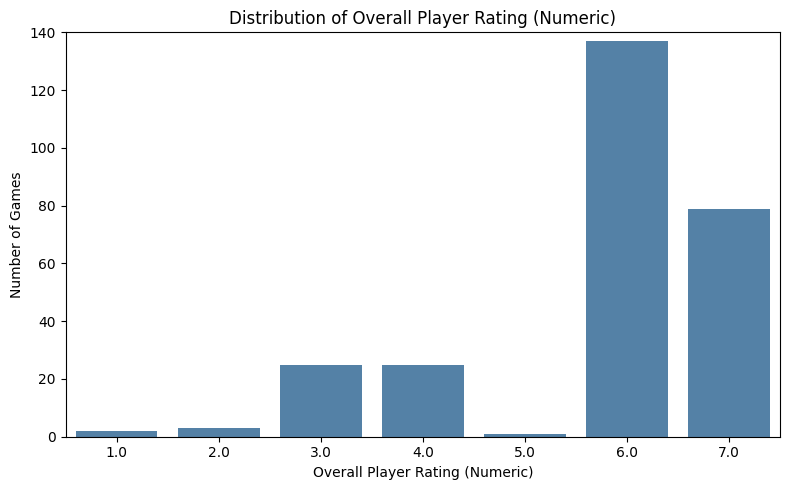

In [1066]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    x="overall_player_rating_numeric",
    data=unique_game_df,
    color="steelblue",
    order=sorted(unique_game_df["overall_player_rating_numeric"].dropna().unique()),
)
plt.title("Distribution of Overall Player Rating (Numeric)")
plt.xlabel("Overall Player Rating (Numeric)")
plt.ylabel("Number of Games")
plt.ylim(0, 140)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


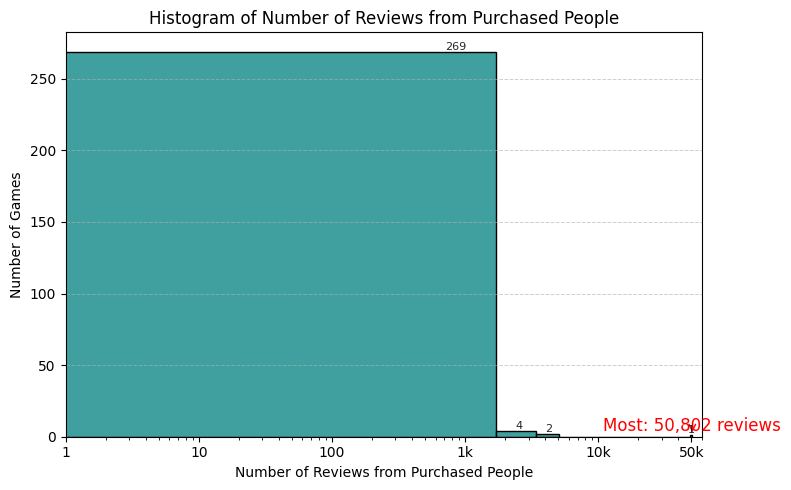

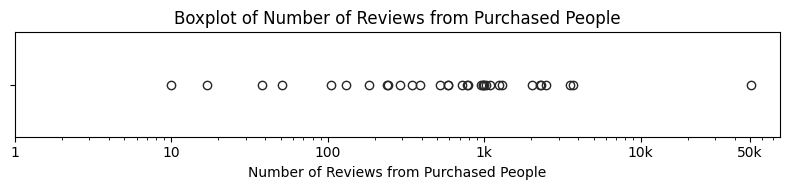

In [1067]:
#2 Review and popularity by number_of_reviews_from_purchased_people:
plt.figure(figsize=(8,5))
sns.histplot(
    unique_game_df["number_of_reviews_from_purchased_people"].dropna(), 
    kde=False, 
    bins=30, 
    color="teal"
)
plt.title("Histogram of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.ylabel("Number of Games")
plt.tight_layout()
# Enhanced and more informative histogram

# Add grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Use log scale for x-axis if there are large outliers (optional, comment if not desired)
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)

# Add annotation for max value (most reviewed game)
if not unique_game_df["number_of_reviews_from_purchased_people"].dropna().empty:
    max_val = unique_game_df["number_of_reviews_from_purchased_people"].max()
    count_max = (unique_game_df["number_of_reviews_from_purchased_people"] == max_val).sum()
    plt.annotate(
        f"Most: {int(max_val):,} reviews",
        xy=(max_val, count_max),
        xytext=(max_val, count_max+3),
        arrowprops=dict(arrowstyle="->", color="red"),
        color='red',
        fontsize=12,
        ha='center'
    )

# Add value labels on top of each bar (limited to avoid clutter for big bins)
for patch in plt.gca().patches:
    if patch.get_height() > 0:
        plt.gca().annotate(
            int(patch.get_height()),
            (patch.get_x() + patch.get_width() / 2, patch.get_height()),
            ha='center', va='bottom', fontsize=8, color='black', alpha=0.85
        )

# Alternative plot: Boxplot to show the distribution and outliers
plt.tight_layout()
plt.figure(figsize=(8,2))
sns.boxplot(
    x=unique_game_df["number_of_reviews_from_purchased_people"].dropna(),
    color="teal"
)
plt.title("Boxplot of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)
plt.tight_layout()
plt.show()


In [1068]:
#3 relation between quality and popularity: overall_player_rating_numeric vs. ספירת ביקורות
# Calculate the correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people
rating_col = "overall_player_rating_numeric"
reviews_col = "number_of_reviews_from_purchased_people"

# Only keep rows where both columns are not null
corr_df = unique_game_df[[rating_col, reviews_col]].dropna()

# Calculate and print correlation
if not corr_df.empty:
    correlation = corr_df[rating_col].corr(corr_df[reviews_col])
    print(f"Correlation between {rating_col} and {reviews_col}: {correlation:.3f}")
else:
    print("Not enough data to calculate correlation.")


Correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people: -0.010


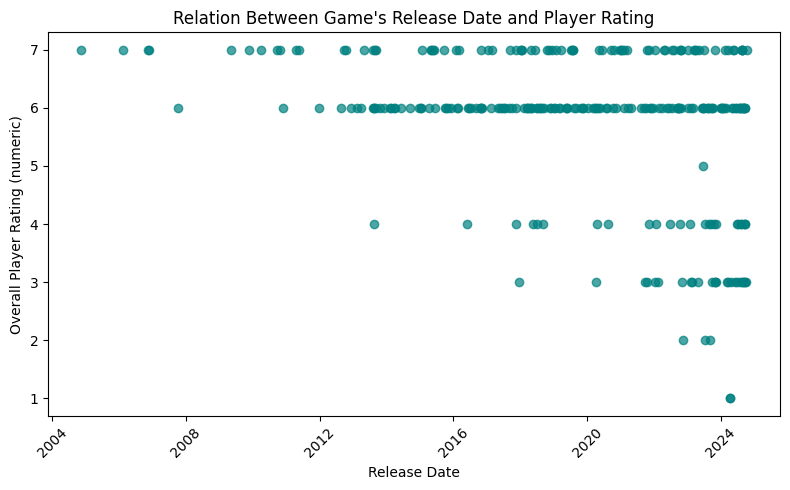

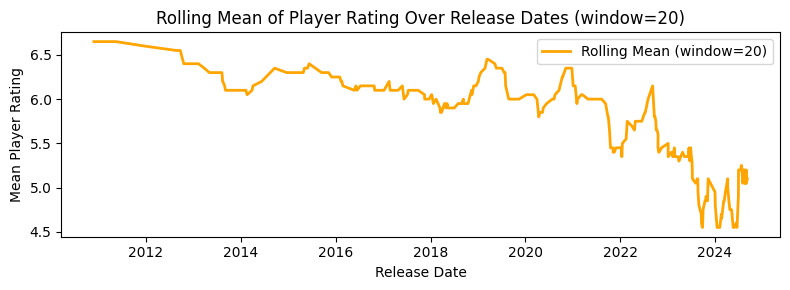

Correlation between game's release date and player rating: -0.373


In [1069]:
#4 Time Trends:
# Analyze relation between game's release date and rating based on unique_game_df

# Ensure relevant columns are present and not null
time_rating_df = unique_game_df[["release_date", "overall_player_rating_numeric"]].dropna()

# Sort by release_date for plotting
time_rating_df = time_rating_df.sort_values("release_date")

# Plot scatter plot: Release date vs. Rating
plt.figure(figsize=(8, 5))
plt.scatter(
    time_rating_df["release_date"],
    time_rating_df["overall_player_rating_numeric"],
    alpha=0.7,
    color='teal'
)
plt.title("Relation Between Game's Release Date and Player Rating")
plt.xlabel("Release Date")
plt.ylabel("Overall Player Rating (numeric)")
plt.xticks(rotation=45)
plt.yticks([1,2,3,4,5,6,7])
plt.tight_layout()
plt.show()

# Optional: Plot rolling mean to show trend over time
window_size = 20  # or set to 10-50, depending on data size for smoothing
time_rating_df["rolling_mean"] = time_rating_df["overall_player_rating_numeric"].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(8, 3))
plt.plot(
    time_rating_df["release_date"],
    time_rating_df["rolling_mean"],
    color="orange",
    linewidth=2,
    label=f"Rolling Mean (window={window_size})"
)
plt.title(f"Rolling Mean of Player Rating Over Release Dates (window={window_size})")
plt.xlabel("Release Date")
plt.ylabel("Mean Player Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr = time_rating_df["release_date"].map(lambda d: d.toordinal()).corr(time_rating_df["overall_player_rating_numeric"])
print(f"Correlation between game's release date and player rating: {corr:.3f}")



The overall quality of the games is maintained, there is a slight decrease in the average rating over time (may be biased becuase new game in the market did not aggregate a lot of reviews)

2. **ניתוח על בסיס genre מבוסס על final_df:**

Mean player rating in each genre (final_df):
normalized_genre
'adventure'          5.906355
'strategy'           5.899408
'rpg'                5.799087
'action'             5.752874
'simulation'         5.712062
'sports & racing'    5.405594
Name: overall_player_rating_numeric, dtype: float64


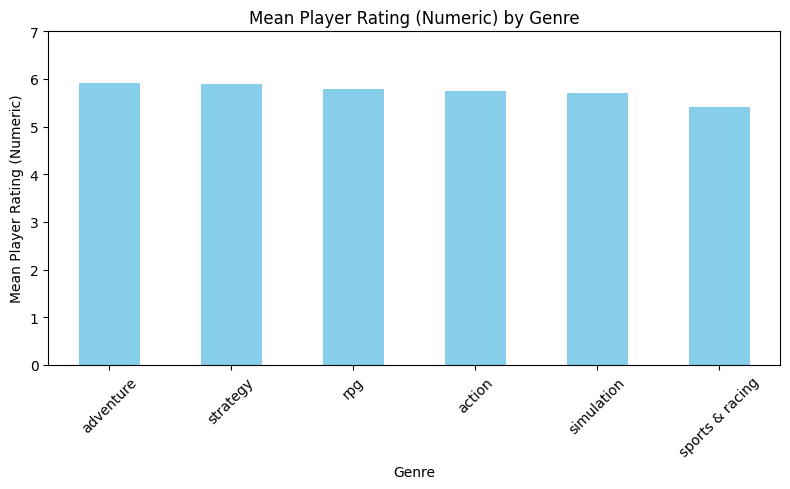

Mean player rating in each genre (final_df):
normalized_genre
adventure          5.906355
strategy           5.899408
rpg                5.799087
action             5.752874
simulation         5.712062
sports & racing    5.405594
Name: overall_player_rating_numeric, dtype: float64


In [1070]:
#1 normalized_genre vs. overall_player_rating_numeric (Genre-based quality comparison):
import matplotlib.pyplot as plt

# Show the mean player rating (numeric) in each genre category (using normalized_genre)
genre_rating_mean = final_df.groupby("normalized_genre")["overall_player_rating_numeric"].mean().sort_values(ascending=False)
print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)
# Remove " from genres names in the index - for pretty printing

genre_rating_mean.index = genre_rating_mean.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_rating_mean.plot(kind='bar', color='skyblue')
plt.title("Mean Player Rating (Numeric) by Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Player Rating (Numeric)")
plt.ylim(0, 7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)


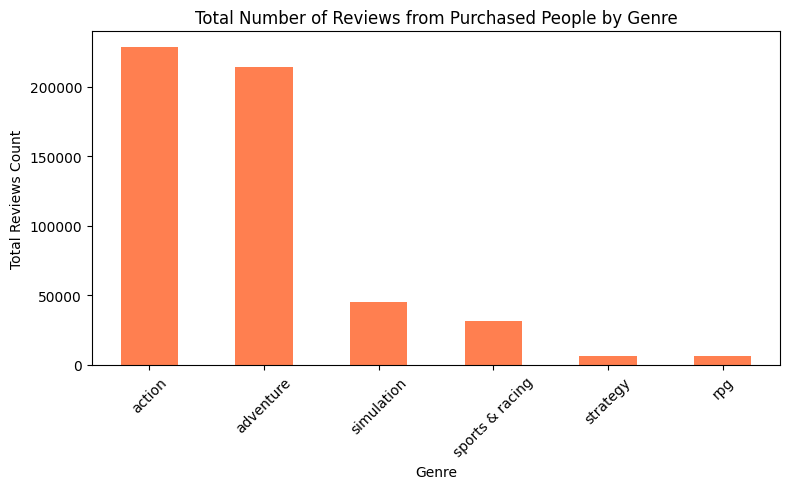

Total number of reviews (from purchased people) in each genre (final_df):
normalized_genre
action             228284
adventure          214423
simulation          45040
sports & racing     31333
strategy             6689
rpg                  6397
Name: number_of_reviews_from_purchased_people, dtype: object


In [1071]:
# 2 Genre-popularity comparison: normalized_genre vs. total count of reviews:
# Show the total number of reviews by genre (using final_df)
genre_review_sum = final_df.groupby("normalized_genre")["number_of_reviews_from_purchased_people"].sum().sort_values(ascending=False)
# Remove quotes for nice labeling
genre_review_sum.index = genre_review_sum.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_review_sum.plot(kind='bar', color='coral')
plt.title("Total Number of Reviews from Purchased People by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Reviews Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total number of reviews (from purchased people) in each genre (final_df):")
print(genre_review_sum)


"Lower is better" for average ranking, Please be aware for that when reading the graph below:
In the ranking list:

• 1st place is the best place (highest in sales/reviews/revenue).

• 40th place is the lowest place in the collected sample

<Figure size 1200x600 with 0 Axes>

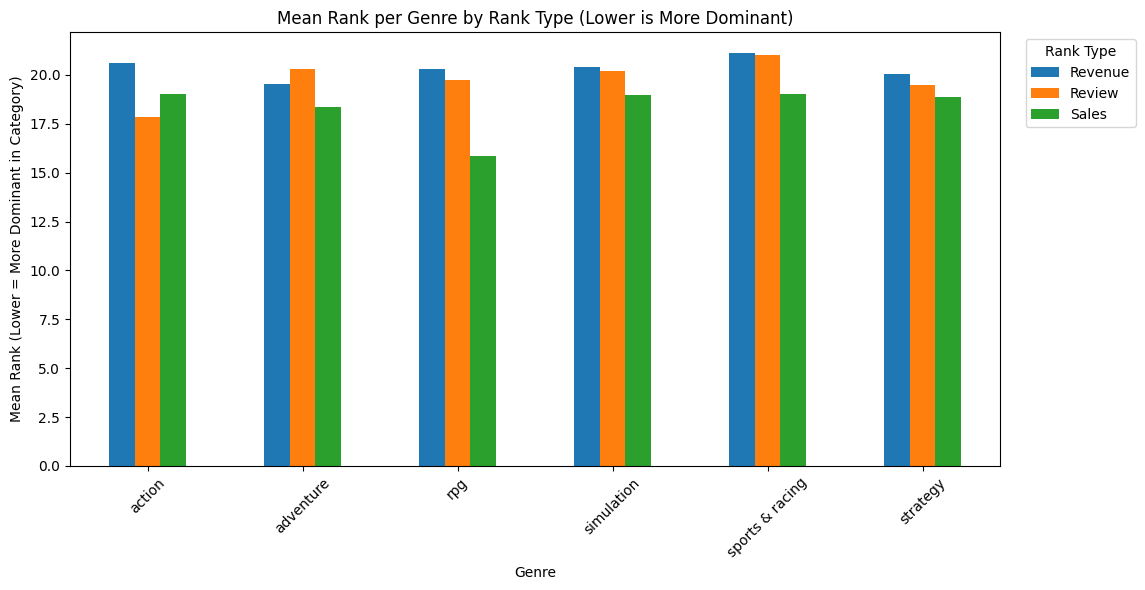

Mean rank for each genre in each rank type category:
normalized_genre     action  adventure        rpg  simulation  \
rank_type                                                       
Revenue           20.604839  19.546296  20.297619   20.411765   
Review            17.827586  20.305263  19.714286   20.191489   
Sales             19.036036  18.375000  15.846154   18.987342   

normalized_genre  sports & racing   strategy  
rank_type                                     
Revenue                 21.117647  20.017544  
Review                  21.037736  19.465517  
Sales                   19.000000  18.888889  


In [1072]:
# Group by rank_type and normalized_genre, calculate mean rank (lower = more dominant)
ranktype_genre_rank = final_df.groupby(['rank_type', 'normalized_genre'])['rank'].mean().unstack()

# Clean up genre index for nice labeling
ranktype_genre_rank.columns = ranktype_genre_rank.columns.str.replace("'", "").str.strip()
ranktype_genre_rank.index = ranktype_genre_rank.index.str.strip()

# Plot
plt.figure(figsize=(12,6))
ranktype_genre_rank.T.plot(kind='bar', figsize=(12,6))
plt.title("Mean Rank per Genre by Rank Type (Lower is More Dominant)")
plt.ylabel("Mean Rank (Lower = More Dominant in Category)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0,0,0.85,1])  # Give space for legend
plt.legend(title='Rank Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Display as table for more insight
print("Mean rank for each genre in each rank type category:")
print(ranktype_genre_rank)


Mean rank for each genre in each rank type category:
normalized_genre     action  adventure        rpg  simulation  \
rank_type                                                       
Revenue           20.604839  19.546296  20.297619   20.411765   
Review            17.827586  20.305263  19.714286   20.191489   
Sales             19.036036  18.375000  15.846154   18.987342   

normalized_genre  sports & racing   strategy  
rank_type                                     
Revenue                 21.117647  20.017544  
Review                  21.037736  19.465517  
Sales                   19.000000  18.888889  


<Figure size 1000x600 with 0 Axes>

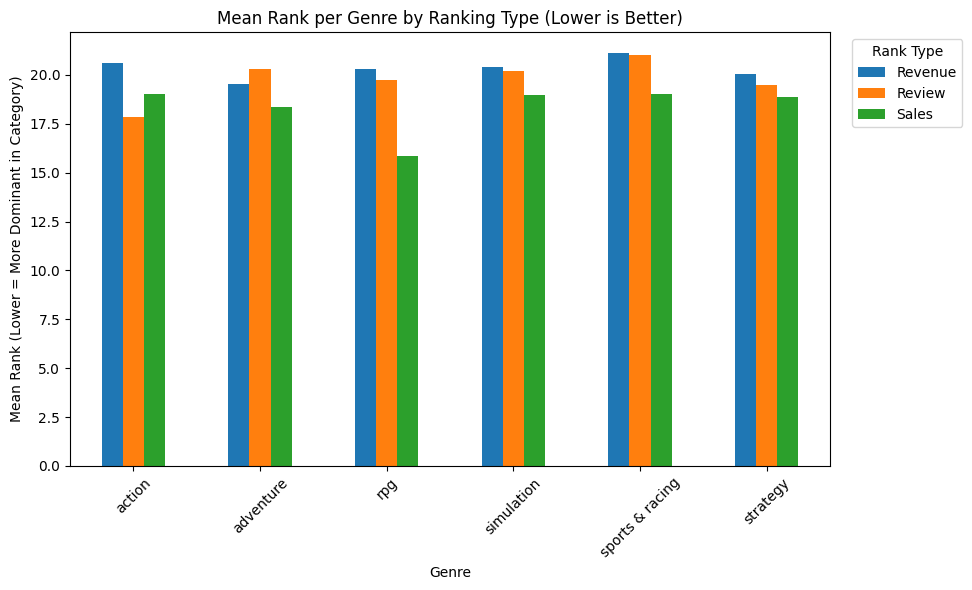

Mean rank for each genre in each rank type category:
normalized_genre     action  adventure        rpg  simulation  \
rank_type                                                       
Revenue           20.604839  19.546296  20.297619   20.411765   
Review            17.827586  20.305263  19.714286   20.191489   
Sales             19.036036  18.375000  15.846154   18.987342   

normalized_genre  sports & racing   strategy  
rank_type                                     
Revenue                 21.117647  20.017544  
Review                  21.037736  19.465517  
Sales                   19.000000  18.888889  
Genres present in mean-rank table: ['action', 'adventure', 'rpg', 'simulation', 'sports & racing', 'strategy']
'Sports & Racing' column found as: sports & racing
Values by rank_type for Sports & Racing genre:
rank_type
Revenue    21.117647
Review     21.037736
Sales      19.000000
Name: sports & racing, dtype: float64
No missing values for Sports & Racing.

Rows per rank_type for 'Sp

In [1073]:
#3 analysing the rating type: (rank_type (Sales, Revenue, Reviews) vs. normalized_genre)

print("Mean rank for each genre in each rank type category:")
print(ranktype_genre_rank)
plt.figure(figsize=(10,6))
# Explicitly ensure "Sports & Racing" genre is included in the x labels if missing
if 'sports & racing' not in ranktype_genre_rank.columns.str.lower():
    # Add a blank/NaN column for it to ensure it appears in the plot
    ranktype_genre_rank['Sports & Racing'] = np.nan
ax = ranktype_genre_rank.T.plot(kind='bar', figsize=(10,6))
plt.title("Mean Rank per Genre by Ranking Type (Lower is Better)")
plt.ylabel("Mean Rank (Lower = More Dominant in Category)")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right
plt.legend(title="Rank Type", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Then, print the details (table) for mean rank
print("Mean rank for each genre in each rank type category:")
print(ranktype_genre_rank)
# Why is "Sports & Racing" empty in the above plot?
# Diagnose the data to see if/why it is missing values for some rank_type categories.

# Print which columns/genres are present and missing
print("Genres present in mean-rank table:", list(ranktype_genre_rank.columns))

# Check for missing values per genre, specifically for Sports & Racing
sports_racing_col = None
for col in ranktype_genre_rank.columns:
    if col.lower().strip() in ['sports & racing', "sports&racing", "sportsand racing", "sport & racing"]:
        sports_racing_col = col
        break

if sports_racing_col is None:
    print("Column for 'Sports & Racing' not found; check normalized_genre unique values in data.")
    print("Unique genres in final_df['normalized_genre']:", final_df['normalized_genre'].unique())
else:
    print(f"'Sports & Racing' column found as: {sports_racing_col}")
    print("Values by rank_type for Sports & Racing genre:")
    print(ranktype_genre_rank[sports_racing_col])

    # Which rank_type(s) are missing values for Sports & Racing?
    missing_types = ranktype_genre_rank[sports_racing_col][ranktype_genre_rank[sports_racing_col].isnull()]
    if not missing_types.empty:
        print("Rank type(s) missing for Sports & Racing:", list(missing_types.index))
    else:
        print("No missing values for Sports & Racing.")

# Show count of rows with Sports & Racing per rank_type in the source dataframe
print("\nRows per rank_type for 'Sports & Racing':")
print(final_df[final_df['normalized_genre'].str.lower() == 'sports & racing'].groupby('rank_type').size())

# Show an example of such rows for context
print("\nExamples of 'Sports & Racing' rows in final_df:")
print(final_df[final_df['normalized_genre'].str.lower() == 'sports & racing'][['rank_type', 'rank', 'normalized_genre']].head())



# -  -  -  - 


מדדי ה-KPI צריכים להתמקד במדידת **הצלחה** בהתאם לנתונים שעובדו: דירוג שחקנים, פופולריות (ביקורות) וביצועים ז'אנריים.

להלן הצעות למדדי KPI מרכזיים, המחולקים לפי ה-DataFrame שבה יש להשתמש לצורך החישוב:

### 1. מדדי KPI מבוססי משחק (שימוש בטבלת ה-`unique_df`)

מדדים אלה נותנים תמונה של הצלחת המשחק כשלעצמו, תוך ניטרול השפעת הז'אנר.

| מדד KPI | תיאור המדד | עמודות רלוונטיות ומדוע? |
| :--- | :--- | :--- |
| **KPI 1: שביעות רצון שחקנים ממוצעת (Average Player Satisfaction)** | ממוצע הדירוג המספרי של השחקנים עבור כלל 266 המשחקים. | **`overall_player_rating_numeric`**: עמודה זו נוצרה על ידי קידוד אורדינלי של הדירוג הטקסטואלי, והיא המדד המספרי הישיר לאיכות הנתפסת של המשחק. |
| **KPI 2: היקף חשיפה ופופולריות** | סך הביקורות הממוצע למשחק, או חציון ספירת הביקורות כדי להתמודד עם הטיית משחקי ענק. | **`number_of_reviews_from_purchased_people`**: עמודה זו מייצגת את ספירת הביקורות הכוללת ממשתמשים שרכשו את המשחק, וערכיה טופלו מאנומליות שליליות והומרו ל-`int64`. |
| **KPI 3: יעילות בזמן (Temporal Efficiency)** | ממוצע הדירוג או מספר הביקורות עבור משחקים שיצאו בשנים ספציפיות. | **`release_date`**: עמודה זו הומרה לפורמט `datetime64[ns]`. היא מאפשרת לבחון מגמות לאורך זמן: האם משחקים חדשים (שנים אחרונות) משיגים דירוג טוב יותר או גרוע יותר ממשחקים ותיקים? |

### 2. מדדי KPI מבוססי ז'אנר (שימוש בטבלת ה-`final_df`)

מדדים אלה חיוניים להשוואה בין ששת ז'אנרי הליבה (Action, Strategy, Role Playing וכו') ולניתוח הקשר בין דירוג (מכירות/ביקורות) לז'אנר.

| מדד KPI | תיאור המדד | עמודות רלוונטיות ומדוע? |
| :--- | :--- | :--- |
| **KPI 4: דומיננטיות ז'אנרית באיכות** | הדירוג המספרי הממוצע (KPI 1) המחושב בנפרד עבור כל אחד מששת הז'אנרים. | **`normalized_genre`** vs. **`overall_player_rating_numeric`**: שימוש בטבלה המנופחת (1296 שורות) מאפשר לקבץ את הנתונים (Aggregation) לפי הז'אנר ולזהות איזה ז'אנר משיג את שביעות הרצון הממוצעת הגבוהה ביותר. |
| **KPI 5: דומיננטיות בקטגוריית הדירוג** | ניתוח הדירוג הממוצע (`rank`) של ז'אנר ספציפי בתוך קטגוריה מסוימת, כגון "Reviews" או "Sales". | **`rank`** (שהומר ל-`int64`) vs. **`rank_type`** (סוג הדירוג): הנתונים נאספו עבור 40 המשחקים המובילים בשלושה קריטריונים. KPI זה מודד האם ז'אנר מסוים נוטה להופיע גבוה יותר ברשימות הדירוג (ציון `rank` נמוך יותר) במכירות לעומת ביקורות. |
| **KPI 6: חיוניות ז'אנר** | מספר המשחקים החדשים שיצאו בז'אנר נתון, לפי תקופת זמן. | **`normalized_genre`** vs. **`release_date`**: מדד זה בוחן האם ז'אנר נמצא בצמיחה (יותר משחקים חדשים) או בירידה, ובכך מספק תובנה לגבי הרלוונטיות העדכנית שלו בשוק. |